### Scientific Python Quickstart
With the help of numpy, scipy, matplotlib and torch, Python becomes a powerful tool for scientific computing. Today, we're going to cover some of tools and tricks to using those libraries to write code for CS281.

This tutorial is adapted from the [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson, [Getting started with Python for R developers](http://n-s-f.github.io/2017/03/25/r-to-python.html) by 
Noam Finkelstein, [Linear regression example using Pytorch](https://gist.github.com/lbollar/f7bf60762817a6991038f4323c28f5aa) by Lyndon Ollar.

If you have experience using Matlab, you might find [numpy for Matlab](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users) useful.

#### Installing Python + Numpy
For CS281 we're using Python 3, since it now has full support for most scientific packages we might use. In particular, we'll stick to using Python 3.5 or 3.6. You can check what version of Python you have preinstalled via  `python --version`

These days it's fairly straightforward to install scientific packages for Python. There are two options:
1. Install via [Anaconda](https://conda.io/docs/user-guide/install/download.html), a third-party package manager.
2. Install via `pip`, the builtin package manager (`pip` comes pre-installed in Python 3, thankfully):
```pip install --user numpy scipy matplotlib```

#### Python Basics

**Basic data types**

Numbers:

In [1]:
x = 3.5
print(type(x))
print(x + 1)
print(x ** 2)

# note that in Python 3 / means floating point division, and // means integer division:
print(5/2)
print(5//2)

<class 'float'>
4.5
12.25
2.5
2


Booleans:

In [ ]:
t = True
f = False
print(type(t))
print(t and f)
print(t or f)
print(not t)

Strings:

In [ ]:
hello = 'hello'
print(len(hello))
print(hello[0])

##### Lists
The most basic python data structure is called a list. Much like in R, the Python list can be composed of elements of different types, and just represents an ordered collection:

In [ ]:
xs = [3, 1, 2, 6, 7, 9, 8]
print(xs[-1])
xs[2] = 'foo'
print(xs)
xs.append('bar')
print(xs)
xs.pop()
print(xs)
print(xs[0:4])
print(xs[2:])
print(xs[:2])

In general be careful about lists in scientific Python code. If you're writing for loops over data elements, you're probably doing it wrong. Matrix multiplications are faster.

##### Dictionaries

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}
print(d['cat'])
d['dog'] = 'cute'
print(d['dog'])

##### Loops

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

##### Functions

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

#### Numpy Basics
Numpy stores all data in a compact memory format in the form of `numpy.ndarray`s, which have two important properties: their datatype, and their shape:

In [3]:
import numpy as np
a = np.array([[2, 3, 4], [4, 5, 6]])
print(a.dtype)
print(a.shape)
print(a)

int64
(2, 3)
[[2 3 4]
 [4 5 6]]


You can cast an array to the right datatype, and reshape it to be the right shape:

In [6]:
b = a.astype(np.float32)
print(b.dtype)
c = a.reshape((6, 1))
print(c.dtype)
print(c + 1.2)

float32
int64
[[ 3.2]
 [ 4.2]
 [ 5.2]
 [ 5.2]
 [ 6.2]
 [ 7.2]]


One useful trick is that you can reshape with a flexible shape of -1:

In [7]:
a.reshape((3, -1))

array([[2, 3],
       [4, 4],
       [5, 6]])

In [8]:
a

array([[2, 3, 4],
       [4, 5, 6]])


One of the most useful way to work with numpy arrays is via indexing and broadcasting, which is probably best taught through a few examples (and a [reference](https://scipy.github.io/old-wiki/pages/Cookbook/Indexing)):

In [14]:
a[1, :]

array([0, 2, 2])

In [15]:
np.arange(3)

array([0, 1, 2])

In [13]:
a[:, 1] = 0.
print(a)
a[1, :] = np.arange(3)
print(a)
a[1, 1] = 2.
print(a)

[[2 0 4]
 [1 0 1]]
[[2 0 4]
 [0 1 2]]
[[2 0 4]
 [0 2 2]]


You can create numpy arrays in a lot of ways, but one way to initialize memory to use later is to use `numpy.zeros`, `numpy.ones`, and `numpy.eye`:

In [19]:
print(np.zeros((3, 2)))
print(np.ones(2))
print(np.eye(3))

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[ 1.  1.]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


One incredibly powerful technique is to use `np.bool` arrays to index into a numpy array:

In [21]:
a

array([[2, 0, 4],
       [0, 2, 2]])

In [20]:
print(a > 1)

[[ True False  True]
 [False  True  True]]


In [23]:
a[a > 1] = 100
print(a)

[[100   0 100]
 [  0 100 100]]


The above works because `a > 1` is a boolean array of shape (2, 3), which matches the shape of `a`. Here's another example of viewing and indexing:

In [31]:
a = np.array([[2, 3, 4], [4, 5, 6]])
b = a.reshape((6, -1)).copy()
b[np.arange(6) % 2 == 1] = 10

[[ 2]
 [10]
 [ 4]
 [10]
 [ 5]
 [10]]


In this case, we reviewed `a` as a (6, 1) array, and then indexed in with a boolean array (`np.arange(6) % 2 == 1`) of the same shape, and assigned those values 10. But wait, is that the right shape?

In [27]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [26]:
np.arange(6) % 2 == 1

array([False,  True, False,  True, False,  True], dtype=bool)

What happened here is that numpy *broadcasted* out the extra dimension for you, understanding what was going on. Here's another example of broadcasting:

In [34]:
predicate = np.arange(3) % 2 == 1

In [37]:
a[predicate]

array([[100, 100]])

In [36]:
a = np.array([[2, 3], [4, 4], [5, 6]])
a[predicate] = 100.
print(a)

[[  2   3]
 [100 100]
 [  5   6]]


See the reference for more examples of broadcasting. Recently, PyTorch added support for the same kind of broadcasting.

One big gotcha is that arrays are often copied as views into the same underlying data rather than a copy, so be careful:

In [38]:
b = a
b[:2] = 0
print(b)
print(a)

[[0 0]
 [0 0]
 [5 6]]
[[0 0]
 [0 0]
 [5 6]]


In [40]:
a = np.arange(6).reshape((3, 2))

In [41]:
b = a.copy()
b[:2] = 0
print(b)
print(a)

[[0 0]
 [0 0]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]


#### Math
You can use your usual math operations like you'd expect, though there are few ways to do matrix multiplication:

In [42]:
a = np.random.random(size=(2, 3))
b = np.random.random(size=(2, 3))
a + b

array([[ 0.79952287,  1.74490835,  0.87226242],
       [ 1.36348528,  1.11477356,  0.67510739]])

Taking the transpose so you can multiply matrices is easy:

In [45]:
# equivalent ways of doing the same thing
np.dot(a, b.T)
a.dot(b.T)
a @ b.T

array([[ 1.08875566,  1.03511289],
       [ 0.70975563,  0.80713244]])

In [46]:
# note that this is element-wise multiplication, which is different:
a * b

array([[ 0.15781027,  0.7517463 ,  0.17919909],
       [ 0.46470991,  0.23275293,  0.10966959]])

There are many possible ways to sample from random distributions in `numpy` and `scipy`:

In [48]:
np.random.choice(5, 10)

array([1, 4, 3, 0, 1, 4, 3, 0, 3, 2])

In [49]:
choices = np.random.choice(5, 3)
print(choices)
one_hot = np.zeros((3, 5))
one_hot[np.arange(3), choices] = 1.
print(one_hot)

[1 2 4]
[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]]


In [50]:
np.random.lognormal(size=(2, 2))

array([[ 0.690147  ,  1.49387326],
       [ 1.54489993,  1.64868332]])

In [51]:
from scipy import stats
rv = stats.truncnorm(a=0.1, b=2.)
rv.pdf(0.4)

0.84191036206159553

In general, if there is a mathematical or statistical operation you want to perform, there is almost certainly a way to do it using `numpy` or `scipy`, using builtin operations which are fast. Ask a TF for help if you're ever stuck on this.

#### Matplotlib
While we can't cover everything in `matplotlib`, the default plotting library for scientific Python, we can go over some of the simple examples:

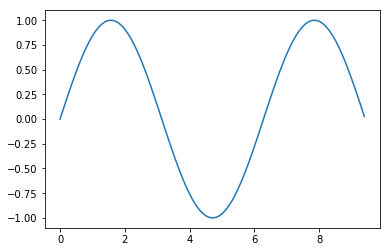

In [52]:
import matplotlib.pyplot as plt

# this line makes our plots inline for IPython
%matplotlib inline 

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

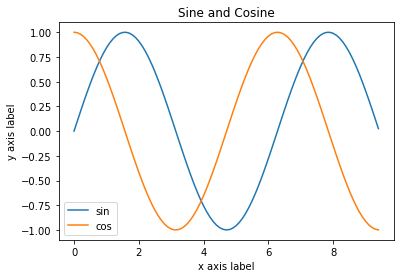

In [54]:
y_sin = y
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='sin')
plt.plot(x, y_cos, label='cos')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend()

One very useful tool is to use `imshow` to examine simple matrices or images to figure out what's going on:

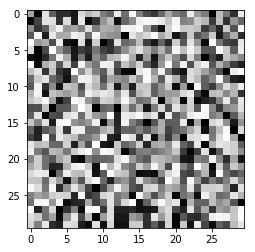

In [55]:
data = np.random.random((30, 30))
plt.imshow(data, cmap='Greys')

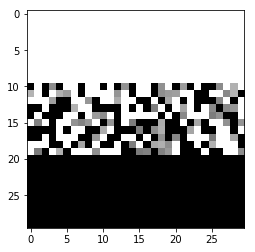

In [56]:
data[:10, :] = 0.
data[20:, :] = 1.
data[data > 0.6] = 1.
data[data < 0.4] = 0.
plt.imshow(data, cmap='Greys')

Of course, it's always very useful to plot distributions:

In [58]:
import seaborn as sns
sns.distplot()

ImportError: No module named 'seaborn'

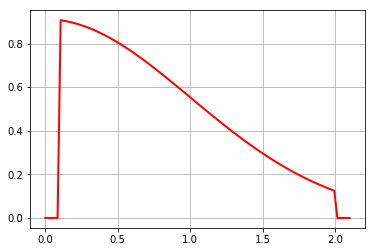

In [57]:
rv = stats.truncnorm(0.1, 2)
x = np.linspace(0.0, 2.1, 100)
plt.plot(x, rv.pdf(x), 'r-', label='truncnorm pdf', lw=2.)
plt.grid()

#### Reminders
These are some reminders (for both CS281 and future courses/projects):
- make sure you label your axes
- make sure you make axes tick labels big enough to read (i.e., use `plt.tick_params(labelsize=14)` etc.)
- try to include legends when it's necessary: 
```
plt.plot(data, label='method_a')
plt.legend()```
- export images in high resolution: `plt.savefig('export.png', dpi=300, bbox_inches='tight')`


#### PyTorch Basics
PyTorch features
* Tensor computation (like numpy) with strong GPU acceleration
* Deep Neural Networks built on a tape-based autograd system

In [59]:
import torch
from torch.autograd import Variable

In [62]:
torch.Tensor(np.random.random((3, 3)))


 0.8741  0.7082  0.9289
 0.4556  0.0554  0.6094
 0.9771  0.7128  0.1069
[torch.FloatTensor of size 3x3]

##### Tensor Basics

In [63]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)
y = x + 2
print(y)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [66]:
print(x + y)

Variable containing:
 4  4
 4  4
[torch.FloatTensor of size 2x2]



##### Automatic Gradient Example

We begin with a 1-d linear regression toy example, where we generate data points by sampling from a line and adding noise.

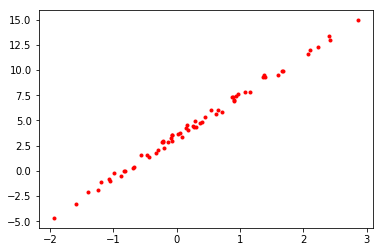

In [67]:
N = 64
a = 3
b = 4

x_data = np.random.randn(N)
noise = np.random.random(N)

y_data = a + b*x_data + noise

plt.plot(x_data,y_data, 'r.')
plt.show()

In order to work with PyTorch, we need to convert numpy arrays to PyTorch variables.

In [68]:
x = Variable(torch.Tensor(x_data), requires_grad=False)
y = Variable(torch.Tensor(y_data), requires_grad=False)

We specify a linear model with two parameters `w_alpha` and `w_beta`: ```y_pred = w_alpha + w_beta * x```. We initialize the parameters from the normal distribution.

In [69]:
w_alpha = Variable(torch.randn(1), requires_grad=True)
w_beta = Variable(torch.randn(1), requires_grad=True)

The initial model:

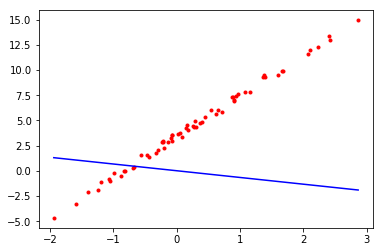

In [70]:
alpha = w_alpha.data.numpy()
beta = w_beta.data.numpy()
x_min = x_data.min()
x_max = x_data.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max
plt.plot(x_data,y_data, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.show()

Now we want to fit the model to the given data points. In order to do so, we minimize `(y_pred-y)^2` and use PyTorch's automatic differentiation to calculate the gradients.

In [72]:
print(w_alpha.grad)

None


In [73]:
optimizer = torch.optim.Adam([w_alpha, w_beta], lr=1e-2)

for t in range(1000):
#     y_pred = x.mul(w_beta).add(w_alpha.expand(N))
    y_pred = x * w_beta + w_alpha
    
    loss = (y_pred - y).pow(2).mean()
    
    if t % 20 == 0:
        print(t, loss.data[0])
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 47.5253791809082
20 43.093719482421875
40 38.9443244934082
60 35.09820556640625
80 31.55081558227539
100 28.289331436157227
120 25.299175262451172
140 22.565532684326172
160 20.07367706298828
180 17.80902099609375
200 15.757184028625488
220 13.904029846191406
240 12.235723495483398
260 10.738764762878418
280 9.400054931640625
300 8.206902503967285
320 7.147120952606201
340 6.209033012390137
360 5.3815178871154785
380 4.654043674468994
400 4.016679286956787
420 3.4601364135742188
440 2.9757580757141113
460 2.555532455444336
480 2.1920859813690186
500 1.8786736726760864
520 1.6091663837432861
540 1.3780298233032227
560 1.180287480354309
580 1.0114967823028564
600 0.8677151799201965
620 0.745461106300354
640 0.6416783928871155
660 0.5536975264549255
680 0.47919830679893494
700 0.4161743223667145
720 0.3628953993320465
740 0.31787875294685364
760 0.27985742688179016
780 0.24775134027004242
800 0.22064319252967834
820 0.1977560818195343
840 0.1784328669309616
860 0.16211789846420288
880 0

Now we convert the fitted parameters back to numpy.

In [74]:
alpha = w_alpha.data.numpy()
beta = w_beta.data.numpy()
print("Optimized Alpha: {0}".format(alpha))
print("Optimized Beta: {0}".format(beta))

Optimized Alpha: [ 3.49714041]
Optimized Beta: [ 3.89685893]


The trained model would be something that looks like below. Since we do not fix random seeds, each run might return a slightly different result.

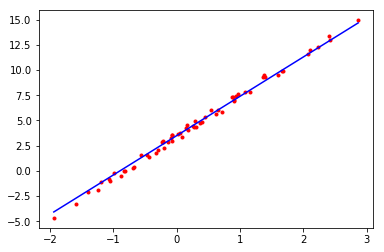

In [75]:
x_min = x_data.min()
x_max = x_data.max()
y_pred_min = alpha + beta*x_min
y_pred_max = alpha + beta*x_max

plt.plot(x_data,y_data, 'r.')
plt.plot([x_min,x_max], [y_pred_min,y_pred_max], 'b-')
plt.show()

More complicated loss functions are implemented inside PyTorch, inside `torch.nn` (e.g. `L1Loss, MSELoss, NLLLoss`, etc.). PyTorch can be thought of as a GPU-optimized version of Numpy, with autograd built in, as well as a whole host of useful transformations that might form the building blocks of 